<a href="https://colab.research.google.com/github/yeyomuri/numpy/blob/main/ordenamiento/ordenamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Ordenamiento de vectores con numpy

In [13]:
import numpy as np
import matplotlib.pyplot as plt


Ordenamiento por seleccion 

O(N x N) 

Ordenaiento deficiente

In [2]:
def selection_sort(x):
  for i in range(len(x)):
    swap = i + np.argmin(x[i:])
    (x[i], x[swap]) = (x[swap], x[i])
  return x


In [3]:
x = np.array([2,1,4,3,5])
selection_sort(x)

array([1, 2, 3, 4, 5])

Ordenamiento por bogosort 

O(N x N!)

Ordenamiento deficiente

In [4]:
def bogosort(x):
  while np.any(x[:-1] > x[1:]):
    np.random.shuffle(x)
  return x



In [5]:
x = np.array([3,5,1,2,8,6,2,])
bogosort(x)

array([1, 2, 2, 3, 5, 6, 8])

Ordenamiento usando quick sort. Viene implicita en la funcion  numpy.sort() 

In [6]:
array = np.array([2,3,6,3,1,0,-1,4,5])
array.sort()
print(array)

[-1  0  1  2  3  3  4  5  6]


Ordenamiento a traves de columnas y filas


In [7]:
#Creación de una matriz 4 x 6 para valores normales
rand  = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [8]:
#Ordenamiento de columnas
np.sort(X, axis = 0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [9]:
#Ordenamiento de filas
np.sort(X, axis = 1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

Agrupamiento parcial. Divide el arrego en la posicion K, creando dos clusters o grupos con los valores mas bajos y altos no ordenados

In [10]:
Y = np.random.RandomState(50)

In [11]:
np.partition(X, 2, axis = 1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

In [12]:
X  = rand.rand(10, 2)

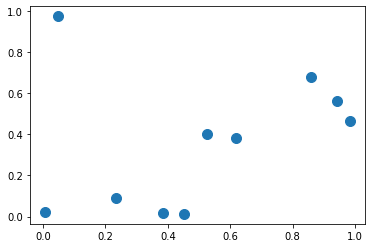

In [16]:
plt.scatter(X[:, 0], X[:, 1], s = 100)

In [19]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, : , :]) ** 2, axis = -1)

In [20]:
diffferences = X[:, np.newaxis, :] - X[np.newaxis, :, :]

In [21]:
sq_differences = diffferences ** 2
sq_differences.shape

(10, 10, 2)

In [24]:
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [25]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
narest = np.argsort(dist_sq, axis = 1)
print(narest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


In [27]:
K = 2
narest_partition = np.argpartition(dist_sq, K + 1, axis = 1)

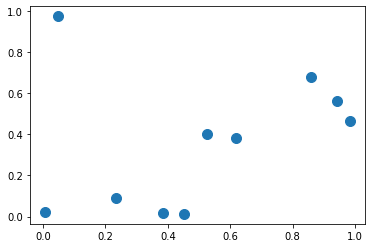

In [28]:
plt.scatter(X[:, 0], X[:, 1], s = 100)

In [29]:
K = 2

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: ignored

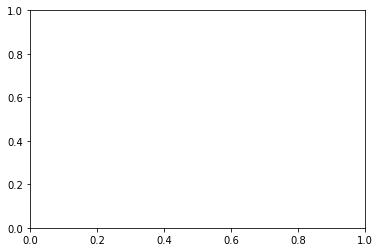

In [33]:
for i in range(X.shape[0]):
  for j in narest_partition[i: K +1]:
    plt.plot(*zip(X[j], X[i]), color='black')